In [2]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 3263.5, 4895.5, -0.5)

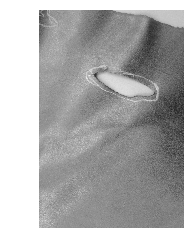

In [4]:
img_path = '/Users/xiaojun/Desktop/sample_photo/归档/DSCF7088.JPG'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.axis('off')

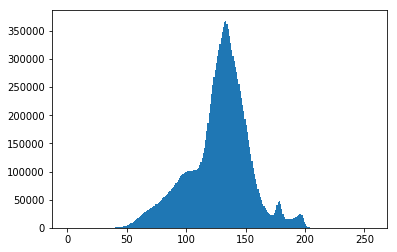

In [5]:
plt.hist(img.ravel(),256,[0,256]);plt.show()

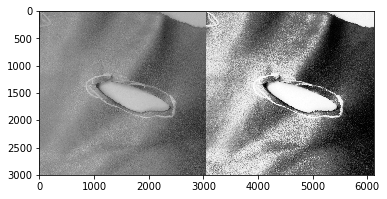

In [19]:
img_crop = img[100:3100,200:4600]
img_equ = cv2.equalizeHist(img_crop)
show_img = np.hstack((img_crop, img_equ))
plt.imshow(show_img, cmap='gray')

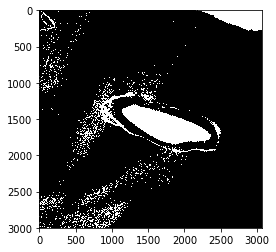

In [45]:
ret,th1 = cv2.threshold(img_equ,230,255,cv2.THRESH_BINARY)
plt.imshow(th1,cmap='gray')

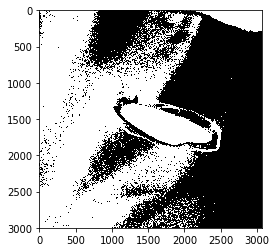

In [27]:
#img_blur = cv2.GaussianBlur(img,(10,10),0)
ret3,th3 = cv2.threshold(img_equ,0,10,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3, cmap='gray')

In [39]:
from skimage.filters import gaussian

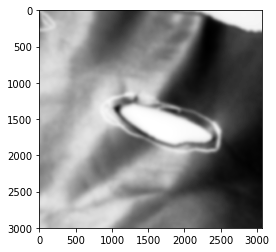

In [78]:
img_blur = gaussian(img_equ,sigma=20)*255
plt.imshow(img_blur,cmap='gray')

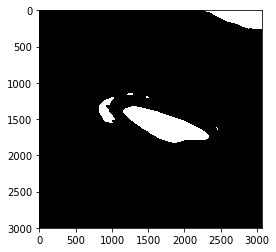

In [81]:
ret,th1 = cv2.threshold(img_blur,230,255,cv2.THRESH_BINARY)
plt.imshow(th1, cmap='gray')

(-0.5, 3063.5, 2999.5, -0.5)

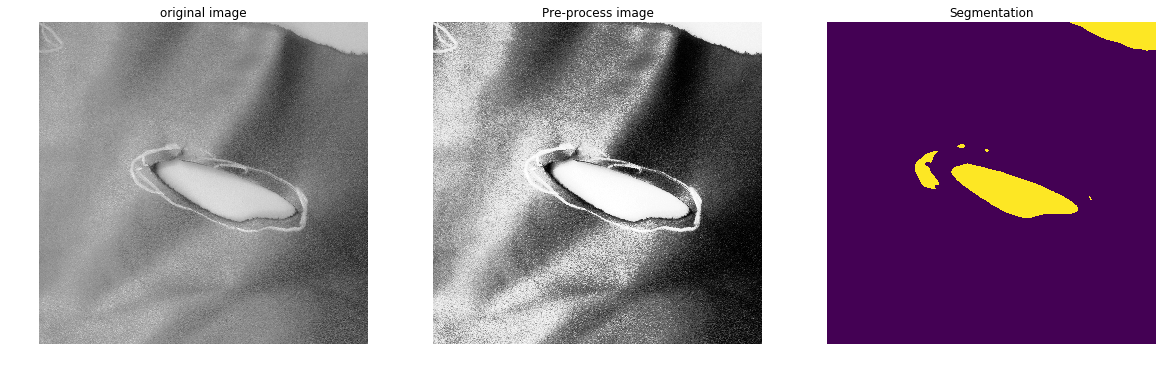

In [82]:
plt.figure(figsize=(20,25))
plt.subplot(131)
plt.imshow(img_crop, cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_equ, cmap='gray')
plt.title('Pre-process image')
plt.axis('off')

plt.subplot(133)
plt.imshow(th1)
plt.title('Segmentation')
plt.axis('off')

In [108]:
img_path1 = '/Users/xiaojun/Desktop/sample_photo/归档/DSCF7090.JPG'
img2 = cv2.imread(img_path1)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2_equ = cv2.equalizeHist(img2)
img2_blur = gaussian(img2_equ, sigma=20)*255

In [119]:
ret,th2 = cv2.threshold(img2_blur,220,255,cv2.THRESH_BINARY)

(-0.5, 3263.5, 4895.5, -0.5)

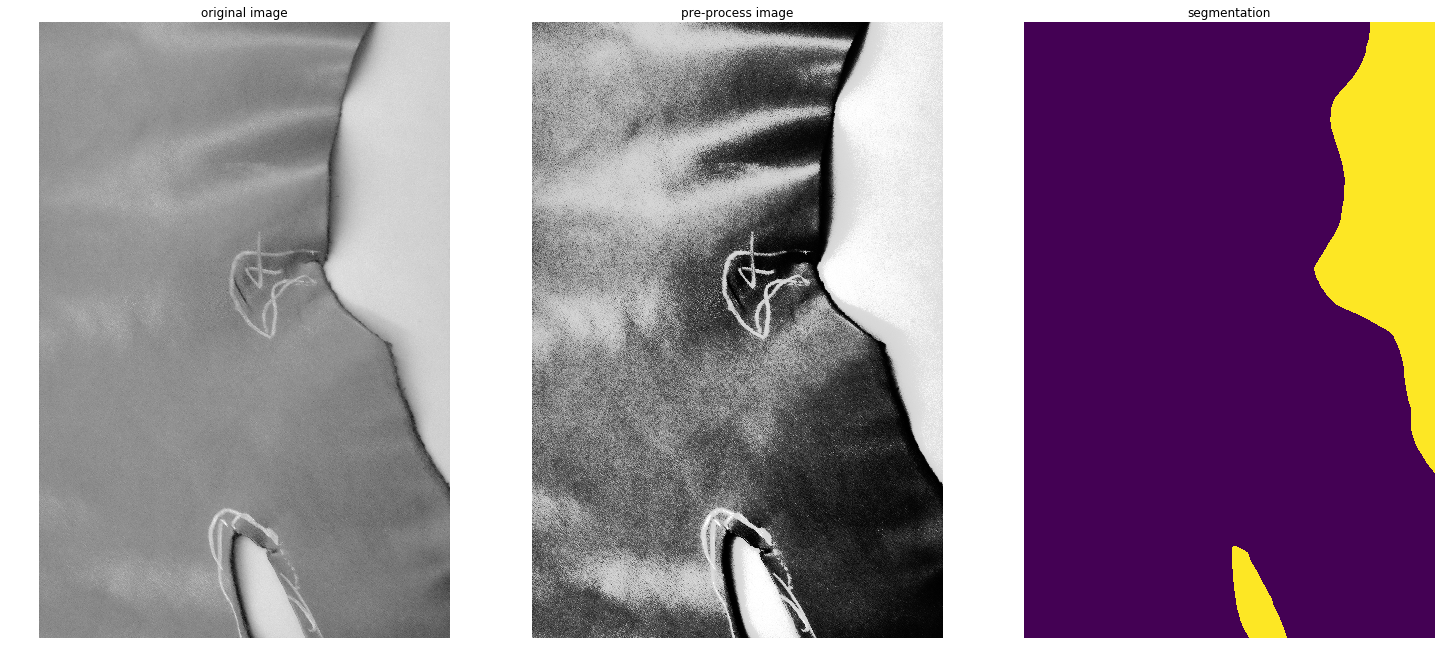

In [120]:
plt.figure(figsize=(25,20))

plt.subplot(131)
plt.imshow(img2,cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img2_equ,cmap='gray')
plt.title('pre-process image')
plt.axis('off')

plt.subplot(133)
plt.imshow(th2)
plt.title('segmentation')
plt.axis('off')

In [107]:
img2_original.shape

(4896, 3264, 3)

# Eliminate illumination

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 2663.5, 3855.5, -0.5)

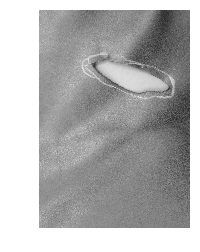

In [6]:
img_path = '/Users/xiaojun/Desktop/sample_photo/photo_sample/save_length/DSCF7088.JPG'
img = cv2.imread(img_path,0)
plt.imshow(img,cmap='gray')
plt.axis('off')

(-0.5, 2463.5, 2999.5, -0.5)

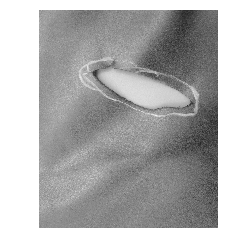

In [8]:
img_crop = img[100:3100,200:4600]
plt.imshow(img_crop, cmap='gray')
plt.axis('off')

In [159]:
img2_equ = cv2.equalizeHist(img_crop)

(-0.5, 2463.5, 2999.5, -0.5)

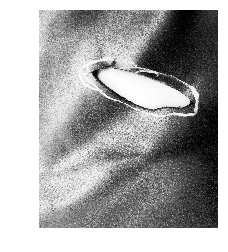

In [160]:
plt.imshow(img2_equ, cmap='gray')
plt.axis('off')

In [161]:
from skimage.filters.rank import maximum, mean
from skimage.morphology import square,disk

In [177]:
bright = maximum(img2_equ, disk(30))
bright = mean(bright, disk(30))*255

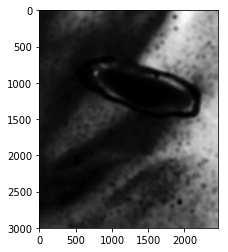

In [178]:
plt.imshow(bright, cmap='gray')

In [116]:
from skimage.filters import gaussian

In [181]:
res = img2_equ-bright
#res_blur = gaussian(res_blur, sigma=10)*255

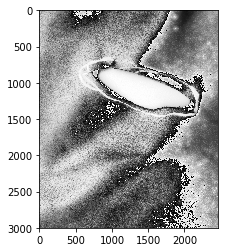

In [182]:
plt.imshow(res,cmap='gray')

In [197]:
ret,th1 = cv2.threshold(res,240,255,cv2.THRESH_BINARY)

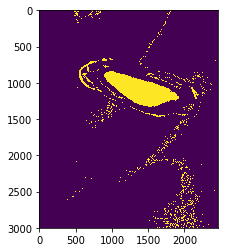

In [198]:
plt.imshow(th1)

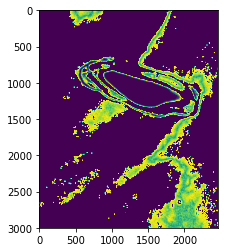

In [201]:
th1 = mean(th1, disk(3))
plt.imshow(th1)